In [174]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

Input_Imagedir="/home/lachlan/CODEBASE/SEM_segmentation/trial_data/Eline_BT386C2/Input_Images"
Unet_Outputdir="/home/lachlan/CODEBASE/SEM_segmentation/trial_data/Eline_BT386C2/Output_Masks_UNet"

imtoload="BT386C200064.tif"

#imtoload="BT386C200037.tif"     #ok, big particle at edge
#imtoload="BT386C200030.tif"    #ok, shows edge missing
#imtoload="BT386C200049.tif"    #big particles good
#imtoload="BT386C200063.tif"    #good
#imtoload="BT386C200003.tif"    #bad, misses lots
#imtoload="BT386C200064.tif"    #bad, picks up background



In [175]:
def edgedetect_canny(img):
    """
    perform canny edge detection
    """

    edges = cv2.Canny(image = img, threshold1=100, threshold2=200)
    return edges

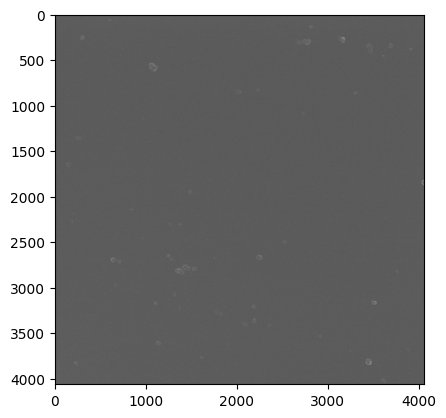

In [176]:
f_in=os.path.join(Input_Imagedir, imtoload)
f_out=os.path.join(Unet_Outputdir, imtoload)

img_in=cv2.imread(f_in)
img_out=cv2.imread(f_out)

plt.imshow(img_in)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


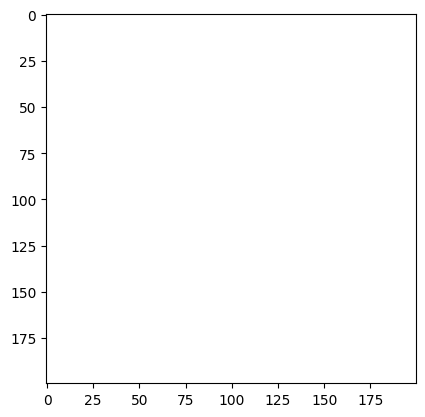

In [177]:
edges=edgedetect_canny(img_out)

plt.imshow(edges[1600:1800,2700:2900], cmap="binary")

print(edges[1750:1800,2700:2900])

(4, 4064, 4064)
(4064, 4064, 4)


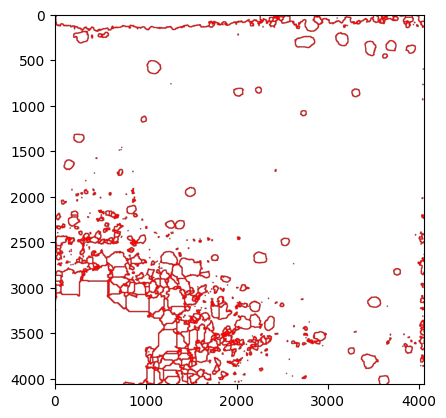

In [178]:
grow_kernel=np.ones((6, 6), dtype='uint8')

#plt.imshow(edges)

r = edges
g = np.zeros(edges.shape)
b = np.zeros(edges.shape)
a = edges

r=cv2.dilate(r, grow_kernel)
r=cv2.dilate(r, grow_kernel)
a=cv2.dilate(a, grow_kernel)
a=cv2.dilate(a, grow_kernel)

outlines=np.array([r,g,b,a])

print(outlines.shape)

outlines=np.swapaxes(outlines, 0, 1)
outlines=np.swapaxes(outlines, 1, 2)

print(outlines.shape)
outlines=outlines.astype(np.uint8)

#plt.imshow(outlines[2400:2500,2000:2100,:])
plt.imshow(outlines)
#result = cv2.merge([r, g, b])

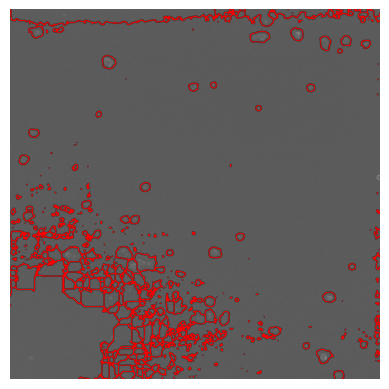

In [192]:
f, ax = plt.subplots(1,1)

ax.axis('off')
ax = plt.imshow(img_in)
ax = plt.imshow(outlines)

plt.show()


f.savefig(f"{os.path.splitext(imtoload)[0]}.png", dpi=300, bbox_inches='tight')



In [180]:
"""
img1=PIL.Image.fromarray(img_in)
img2=PIL.Image.fromarray(outlines)

img1.paste(img2, (0,0), mask = img2)

img1.show()
"""


'\nimg1=PIL.Image.fromarray(img_in)\nimg2=PIL.Image.fromarray(outlines)\n\nimg1.paste(img2, (0,0), mask = img2)\n\nimg1.show()\n'